In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# install lime
!pip install lime

In [3]:
# import some librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
import lime

from PIL import Image
from wordcloud import WordCloud
from lime.lime_text import LimeTextExplainer
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn import metrics

In [5]:
# you have to change the path
dataSet1 = pd.read_csv('/content/drive/MyDrive/Abschlussarbeit/Datasets/Dataset/article_and_tweets_with_cleaning.csv', sep = ",")
dataSet2 = pd.read_csv('/content/drive/MyDrive/Abschlussarbeit/Datasets/Dataset/article_and_tweets_without_cleaning.csv', sep = ",")
dataSet3 = pd.read_csv('/content/drive/MyDrive/Abschlussarbeit/Datasets/Dataset/tweets_with_cleaning.csv', sep = ",")
dataSet4 = pd.read_csv('/content/drive/MyDrive/Abschlussarbeit/Datasets/Dataset/tweets_without_cleaning.csv', sep = ",")
dataSet_array = [dataSet1, dataSet2, dataSet3, dataSet4]

------------------------------------------------------------
!!!!!  sub-experiment with Naive-Bayes model number 4: 
!!!!!  dataset used is : tweets without cleaning  !!!!!
------------------------------------------------------------
             !!!!!  split number : 1  !!!!!
     In training: Counter({True: 8958, False: 8908})
     In testing: Counter({False: 1018, True: 968})


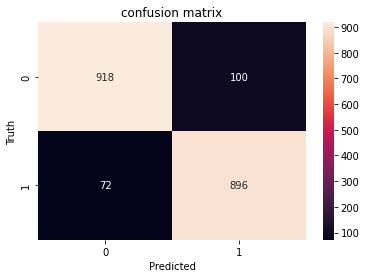

              precision    recall  f1-score   support

       False       0.93      0.90      0.91      1018
        True       0.90      0.93      0.91       968

    accuracy                           0.91      1986
   macro avg       0.91      0.91      0.91      1986
weighted avg       0.91      0.91      0.91      1986

             !!!!!  split number : 2  !!!!!
     In training: Counter({False: 8949, True: 8917})
     In testing: Counter({True: 1009, False: 977})


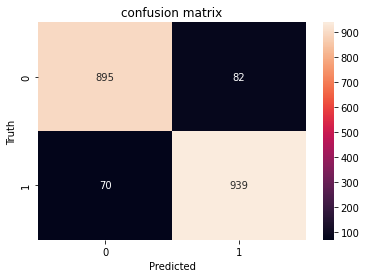

              precision    recall  f1-score   support

       False       0.93      0.92      0.92       977
        True       0.92      0.93      0.93      1009

    accuracy                           0.92      1986
   macro avg       0.92      0.92      0.92      1986
weighted avg       0.92      0.92      0.92      1986

             !!!!!  split number : 3  !!!!!
     In training: Counter({True: 8948, False: 8919})
     In testing: Counter({False: 1007, True: 978})


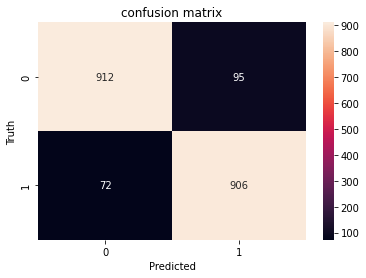

              precision    recall  f1-score   support

       False       0.93      0.91      0.92      1007
        True       0.91      0.93      0.92       978

    accuracy                           0.92      1985
   macro avg       0.92      0.92      0.92      1985
weighted avg       0.92      0.92      0.92      1985

             !!!!!  split number : 4  !!!!!
     In training: Counter({False: 8941, True: 8926})
     In testing: Counter({True: 1000, False: 985})


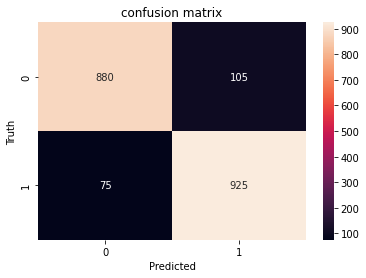

              precision    recall  f1-score   support

       False       0.92      0.89      0.91       985
        True       0.90      0.93      0.91      1000

    accuracy                           0.91      1985
   macro avg       0.91      0.91      0.91      1985
weighted avg       0.91      0.91      0.91      1985

             !!!!!  split number : 5  !!!!!
     In training: Counter({False: 8940, True: 8927})
     In testing: Counter({True: 999, False: 986})


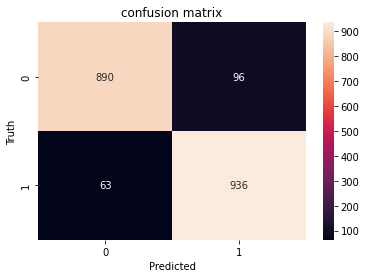

              precision    recall  f1-score   support

       False       0.93      0.90      0.92       986
        True       0.91      0.94      0.92       999

    accuracy                           0.92      1985
   macro avg       0.92      0.92      0.92      1985
weighted avg       0.92      0.92      0.92      1985

             !!!!!  split number : 6  !!!!!
     In training: Counter({False: 8950, True: 8917})
     In testing: Counter({True: 1009, False: 976})


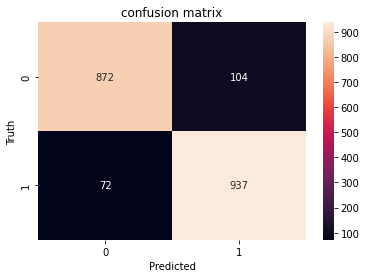

              precision    recall  f1-score   support

       False       0.92      0.89      0.91       976
        True       0.90      0.93      0.91      1009

    accuracy                           0.91      1985
   macro avg       0.91      0.91      0.91      1985
weighted avg       0.91      0.91      0.91      1985

             !!!!!  split number : 7  !!!!!
     In training: Counter({True: 8987, False: 8880})
     In testing: Counter({False: 1046, True: 939})


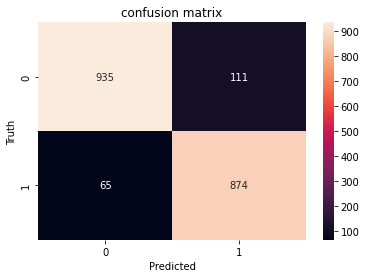

              precision    recall  f1-score   support

       False       0.94      0.89      0.91      1046
        True       0.89      0.93      0.91       939

    accuracy                           0.91      1985
   macro avg       0.91      0.91      0.91      1985
weighted avg       0.91      0.91      0.91      1985

             !!!!!  split number : 8  !!!!!
     In training: Counter({False: 8946, True: 8921})
     In testing: Counter({True: 1005, False: 980})


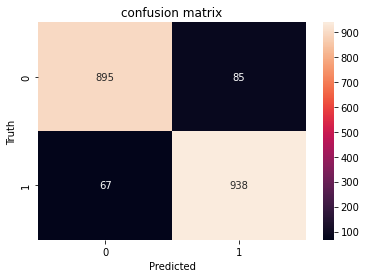

              precision    recall  f1-score   support

       False       0.93      0.91      0.92       980
        True       0.92      0.93      0.93      1005

    accuracy                           0.92      1985
   macro avg       0.92      0.92      0.92      1985
weighted avg       0.92      0.92      0.92      1985

             !!!!!  split number : 9  !!!!!
     In training: Counter({False: 8940, True: 8927})
     In testing: Counter({True: 999, False: 986})


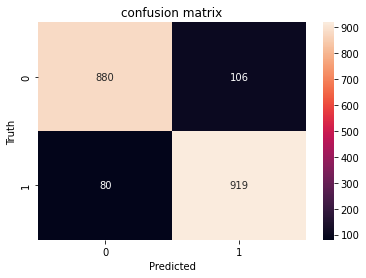

              precision    recall  f1-score   support

       False       0.92      0.89      0.90       986
        True       0.90      0.92      0.91       999

    accuracy                           0.91      1985
   macro avg       0.91      0.91      0.91      1985
weighted avg       0.91      0.91      0.91      1985

             !!!!!  split number : 10  !!!!!
     In training: Counter({False: 8961, True: 8906})
     In testing: Counter({True: 1020, False: 965})


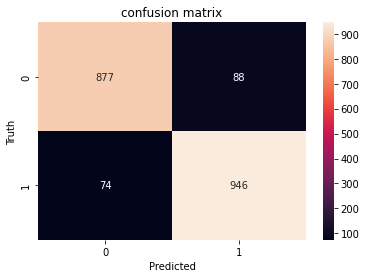

              precision    recall  f1-score   support

       False       0.92      0.91      0.92       965
        True       0.91      0.93      0.92      1020

    accuracy                           0.92      1985
   macro avg       0.92      0.92      0.92      1985
weighted avg       0.92      0.92      0.92      1985

mean accuracy for this sub_experiment is 0.92
mean recall for this sub_experiment is 0.93
mean precision for this sub_experiment is 0.9
mean f1_score for this sub_experiment is 0.92
---------------------------------------------------------
                   End of Experiment
---------------------------------------------------------
mean accuracy for this experiment is 0.23
mean recall for this experiment is 0.23
mean precision for this experiment is 0.23
mean f1_score for this experiment is 0.23


In [26]:
sub_experiment_count = 1
accuracy  = 0
recall    = 0
f1_score  = 0
precision = 0

for dataSet in dataSet_array:
  dataSet_text = dataSet['text']
  dataSet_label = dataSet['label']
  sub_accuracy  = 0
  sub_recall    = 0
  sub_f1_score  = 0
  sub_precision = 0
  print('------------------------------------------------------------')
  #some output
  if sub_experiment_count == 1:
    print('!!!!!  sub-experiment with Naive-Bayes model number 1: ')
    print('!!!!!  dataset used is : article and tweets with cleaning  !!!!!')
  elif sub_experiment_count == 2:
    print('!!!!!  sub-experiment with Naive-Bayes model number 2: ')
    print('!!!!!  dataset used is : article and tweets without cleaning  !!!!!')
  elif sub_experiment_count == 3:
    print('!!!!!  sub-experiment with Naive-Bayes model number 3: ')
    print('!!!!!  dataset used is : tweets with cleaning  !!!!!')
  elif sub_experiment_count == 4:
    print('!!!!!  sub-experiment with Naive-Bayes model number 4: ')
    print('!!!!!  dataset used is : tweets without cleaning  !!!!!')
  print('------------------------------------------------------------')
  
  
  #cross validation counter
  kfold = KFold(n_splits=10, shuffle=True)
  split = 1
  #cross validation loop
  for train, test in kfold.split(dataSet_text, dataSet_label):
    #convert the vectors to np array
    training_padded = np.array(dataSet_text[train])
    training_labels = np.array(dataSet_label[train])
    testing_padded = np.array(dataSet_text[test])
    testing_labels = np.array(dataSet_label[test])

    #creat Naive-Bayes model
    model = make_pipeline(TfidfVectorizer(), MultinomialNB())
    #fit the model
    model.fit(training_padded, training_labels)
    #get the predicted lable  
    lable_predicted = model.predict(testing_padded)

    #some output
    print('             !!!!!  split number : '+ str(split) + '  !!!!!')
    print('     ' + f'In training: {Counter(training_labels)}')
    print('     ' + f'In testing: {Counter(testing_labels)}')
  
    #create and show the confusion matrix
    cm = metrics.confusion_matrix(testing_labels, lable_predicted)
    sn.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title('confusion matrix')
    plt.show()

    #show the classification report 
    print(metrics.classification_report(testing_labels, lable_predicted))

    #add the new metrics result from the new cross val. to the old  metrics result from the old cross val.
    sub_accuracy  = sub_accuracy + metrics.accuracy_score(testing_labels, lable_predicted)
    sub_recall    = sub_recall + metrics.recall_score(testing_labels, lable_predicted)
    sub_f1_score  = sub_f1_score + metrics.f1_score(testing_labels, lable_predicted)
    sub_precision = sub_precision + metrics.precision_score(testing_labels, lable_predicted)

    #indexing
    split = split + 1

  #compute the mean of the using metrics in the cross val.
  sub_accuracy  = sub_accuracy / 10
  sub_recall    = sub_recall / 10
  sub_f1_score  = sub_f1_score / 10
  sub_precision = sub_precision / 10

  #some output
  print("mean accuracy for this sub_experiment is " + str(round(sub_accuracy, 2)))
  print("mean recall for this sub_experiment is " + str(round(sub_recall, 2)))
  print("mean precision for this sub_experiment is " + str(round(sub_precision, 2)))
  print("mean f1_score for this sub_experiment is " + str(round(sub_f1_score, 2)))
  
  #add the new metrics result from the new sub experiment to the old  metrics result from the old sub experiments
  accuracy  = accuracy + sub_accuracy
  recall    = recall + sub_recall
  precision = precision + sub_precision
  f1_score  = f1_score + sub_f1_score

  #indexing
  sub_experiment_count = sub_experiment_count + 1

#compute the mean of the using metrics for the 4 sub experiments.
accuracy  = accuracy / 4
recall    = recall / 4
f1_score  = f1_score / 4
precision = precision / 4

#some output
print('---------------------------------------------------------')
print('                   End of Experiment')
print('---------------------------------------------------------')

print("mean accuracy for this experiment is " + str(round(accuracy, 2)))
print("mean recall for this experiment is " + str(round(recall, 2)))
print("mean precision for this experiment is " + str(round(precision, 2)))
print("mean f1_score for this experiment is " + str(round(f1_score, 2)))

In [27]:
# this index is for this tweet 'Google Hyderabad begins screening employees' 
# but when you run the code again you will get another tweet because of the cross
# validation (cross validation make randomly splits)
idx = 202

# get the classes values as list
class_names=list(dataSet_label[train].unique())
# creal the LIME explainer 
explainer = LimeTextExplainer(class_names=["fake","true"])
exp = explainer.explain_instance( dataSet_text[test].iloc[idx], model.predict_proba, num_features=250)

# some output
print('Document id: %d' % idx)
print('Predicted class =', lable_predicted[idx])
print('True class: %s' % dataSet_label[test].iloc[idx])

Document id: 202
Predicted class = True
True class: True


In [351]:
# get the weight for each word in this tweet 'Google Hyderabad begins screening employees'
print ('\n'.join(map(str, exp.as_list(label=1))))

Explanation for class False
('Hyderabad', -0.1977779320282466)
('Google', 0.18220024018921316)
('screening', 0.1499861699784516)
('begins', 0.05908072245373509)
('employees', 0.025912797999618375)


In [352]:
# plot the LIME explainer
exp.show_in_notebook(text=True)

In [31]:
# Find the words that have the greatest impact on the model and put them in 2 lists to use them in the word clouds.
# The first list is for true news
# The second list is for fake news  
true_texts = []
false_texts = []
for idx in range (0,len(dataSet_text[test])):
  class_names=list(dataSet_label[train].unique())
  explainer = LimeTextExplainer(class_names=["fake","true"])
  exp = explainer.explain_instance( dataSet_text[test].iloc[idx], model.predict_proba, num_features=250)
  exp_list = exp.as_list(label=1)
  text = ''
  
  if lable_predicted[idx] == True:
    for i in range (0,4):
      if len(exp_list) == 0:
        continue
      word = exp_list.pop(exp_list.index(max(exp_list,key=lambda item:item[1])))
      if len(text) == 0:
        text = word[0]
      else:
        text = text + ' ' + word[0]
    true_texts.append(text)
  else:
    for i in range (0,4):
      if len(exp_list) == 0:
        continue
      word = exp_list.pop(exp_list.index(min(exp_list,key=lambda item:item[1])))
      if len(text) == 0:
        text = word[0]
      else:
        text = text + ' ' + word[0]
    false_texts.append(text)


In [32]:
# convert the 2 list to strings 
true_text = ' '.join(true_texts)
false_text = ' '.join(false_texts)

In [33]:
# help method for world cloud coloring 
def transform_format(val):
    if val ==0 :
        return val
    else:
        return 255

In [35]:
# creat Twitter logo mask for world cloud
# you have to change the path for image
mask = np.array(Image.open("/content/twitterLogo.png"))
newMask = np.zeros((len(mask), len(mask[0])), np.int32)
for i in range (0,len(mask)):
  for j in range (0,len(mask[0])):
    newMask[i][j] = mask[i][j][0]
transformed_mask = np.ndarray((newMask.shape[0],newMask.shape[1]), np.int32)
for i in range(len(newMask)):
    transformed_mask[i] = list(map(transform_format, newMask[i]))

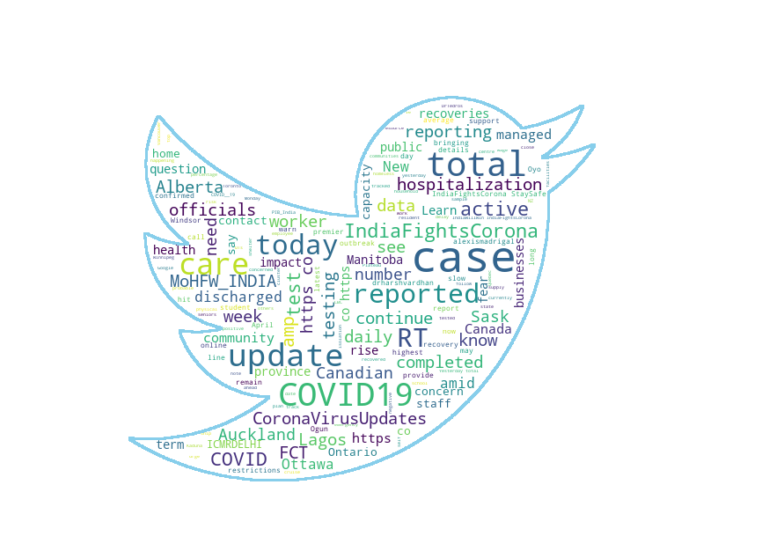

In [36]:
# creat the world cloud for the true news in fourth dataset
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_mask,
                contour_width=4, contour_color='skyblue', min_font_size = 5, max_font_size = 50)

wc.generate(true_text)

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

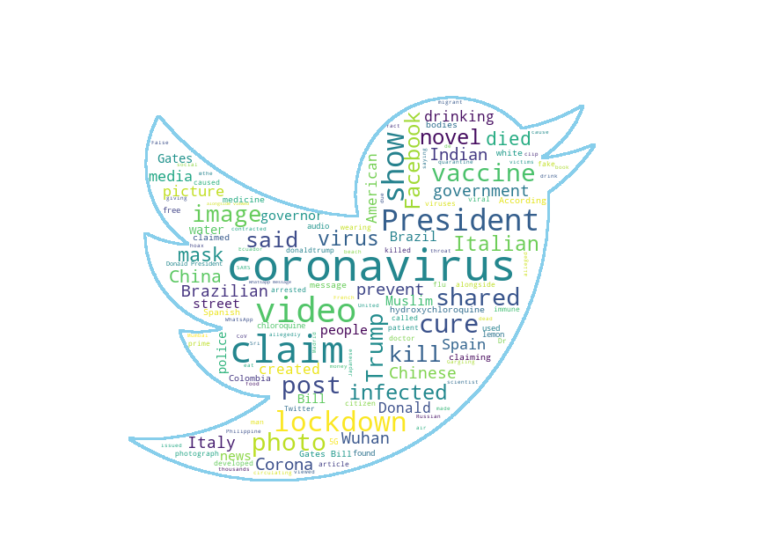

In [37]:
# creat the world cloud for the fake news in fourth dataset
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_mask,
                contour_width=4, contour_color='skyblue', min_font_size = 5, max_font_size = 50)

wc.generate(false_text)

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()